In [29]:
import pandas as pd
import numpy as np

In [59]:
train = pd.read_csv('../data/cell2celltrain.csv')
test = pd.read_csv('../data/cell2cellholdout.csv')

train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [60]:
train.dropna(axis=0, inplace=True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  object 
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

In [61]:
# Unknown -> nan으로 수정
# HandsetPrice, MaritalStatus
train.loc[train['HandsetPrice']=='Unknown', 'HandsetPrice'] = -1
train.loc[train['MaritalStatus']=='Unknown', 'MaritalStatus'] = -1

# Yes, No 문자열 데이터 -> 1과 0로 수정
target_cols = ['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 
            'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 
            'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
            'MadeCallToRetentionTeam', 'MaritalStatus']

for col in target_cols:
    train.loc[train[col]=='Yes', col] = 1
    train.loc[train[col]=='No', col] = 0

train['HandsetPrice'] = train['HandsetPrice'].astype('int64')
train[target_cols] = train[target_cols].astype('int64')

# Known, Unknown 문자열 데이터 -> 1과 0로 수정
# Homeownership
train.loc[train['Homeownership']=='Known', 'Homeownership'] = 1
train.loc[train['Homeownership']=='Unknown', 'Homeownership'] = 0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  int64  
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

### 전처리

In [62]:
train_rows = train.copy()

In [63]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le4 = LabelEncoder()

train_rows['ServiceArea_le'] = le1.fit_transform(train_rows['ServiceArea'])
train_rows['CreditRating_le'] = le2.fit_transform(train_rows['CreditRating'])
train_rows['PrizmCode_le'] = le3.fit_transform(train_rows['PrizmCode'])
train_rows['Occupation_le'] = le4.fit_transform(train_rows['Occupation'])

In [65]:
train_rows.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [66]:
drop_cols = ['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

train_rows.drop(drop_cols, axis=1, inplace=True)
train_rows.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,MaritalStatus,ServiceArea_le,CreditRating_le,PrizmCode_le,Occupation_le
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,4,0,0,30,1,0,655,0,2,4
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,5,0,0,30,0,1,607,3,2,4
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,6,0,0,-1,0,1,349,2,3,1
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,6,0,0,10,0,0,607,3,0,3
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,9,0,1,10,0,1,560,0,0,4


In [69]:
train_corr = train_rows.corr()
train_corr

/var/folders/vm/xb_h6qws599f9m01dh0kl9sc0000gn/T/ipykernel_46003/1055846949.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train_rows.corr()


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,MaritalStatus,ServiceArea_le,CreditRating_le,PrizmCode_le,Occupation_le
CustomerID,1.000000,-0.040186,-0.000594,0.083850,0.051110,-0.004802,0.004191,0.000562,-0.008727,0.004869,...,-0.136868,-0.029918,-0.171203,-0.051592,-0.062490,-0.101480,-0.049651,0.231222,-0.031921,-0.035937
Churn,-0.040186,1.000000,-0.012065,-0.050165,-0.058945,-0.019714,0.015301,0.010955,-0.033194,0.013015,...,-0.012982,0.007700,-0.016123,-0.026449,0.060577,-0.016725,0.003104,-0.047741,0.005204,-0.005276
MonthlyRevenue,-0.000594,-0.012065,1.000000,0.712734,0.629391,0.407523,0.787317,0.304086,-0.027052,-0.014223,...,-0.079309,-0.010377,0.035417,0.221814,0.012137,-0.095844,0.000193,0.139504,-0.051784,-0.032440
MonthlyMinutes,0.083850,-0.050165,0.712734,1.000000,0.585375,0.392950,0.569083,0.112028,-0.044257,-0.038438,...,-0.145964,-0.016976,0.045723,0.276727,0.009875,-0.148764,-0.006439,0.206566,-0.080951,-0.043907
TotalRecurringCharge,0.051110,-0.058945,0.629391,0.585375,1.000000,0.311440,0.201011,0.073855,-0.016284,-0.024126,...,-0.075415,-0.012066,0.044019,0.209550,-0.019139,-0.093209,-0.002984,0.134734,-0.040246,-0.023751
DirectorAssistedCalls,-0.004802,-0.019714,0.407523,0.392950,0.311440,1.000000,0.287109,0.070134,-0.025542,-0.014696,...,-0.014985,-0.006430,0.022616,0.134009,0.011875,-0.040047,-0.008368,0.075219,-0.018149,-0.011358
OverageMinutes,0.004191,0.015301,0.787317,0.569083,0.201011,0.287109,1.000000,0.062955,-0.026377,-0.014570,...,-0.048051,-0.008418,0.021671,0.126572,0.014170,-0.057073,-0.003242,0.081122,-0.031593,-0.025246
RoamingCalls,0.000562,0.010955,0.304086,0.112028,0.073855,0.070134,0.062955,1.000000,-0.055106,-0.093108,...,-0.014034,0.011445,0.004952,0.028898,-0.002468,-0.012124,0.002049,0.015042,-0.000575,-0.006858
PercChangeMinutes,-0.008727,-0.033194,-0.027052,-0.044257,-0.016284,-0.025542,-0.026377,-0.055106,1.000000,0.607504,...,0.012162,-0.005296,-0.004715,-0.001554,-0.023646,0.010307,0.011844,-0.033717,-0.002648,0.005872
PercChangeRevenues,0.004869,0.013015,-0.014223,-0.038438,-0.024126,-0.014696,-0.014570,-0.093108,0.607504,1.000000,...,0.005066,-0.000453,-0.005234,-0.017528,-0.020121,0.004528,0.005408,-0.021758,-0.000193,0.005523


In [168]:
train_corr_abs = train_corr['Churn'].abs().sort_values(ascending=False)
train_corr_abs[:20]

Churn                      1.000000
CurrentEquipmentDays       0.102513
HandsetWebCapable          0.062409
MadeCallToRetentionTeam    0.060577
TotalRecurringCharge       0.058945
RetentionCalls             0.058422
MonthlyMinutes             0.050165
CreditRating_le            0.047741
OffPeakCallsInOut          0.040955
HandsetModels              0.040470
CustomerID                 0.040186
PeakCallsInOut             0.039527
ReceivedCalls              0.037097
CustomerCareCalls          0.035331
RetentionOffersAccepted    0.034511
InboundCalls               0.033855
Handsets                   0.033730
PercChangeMinutes          0.033194
UniqueSubs                 0.032839
OutboundCalls              0.032489
Name: Churn, dtype: float64

### 머신러닝

In [74]:
from sklearn.model_selection import train_test_split

X = train_rows.drop(['Churn'], axis=1)
y = train_rows['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

np.unique(y_train, return_counts=True)

(array([0, 1]), array([28405, 11396]))

#### 1) 이상치제거, 스케일러, 오버샘플링 안 하고 했을 때
- 0.7170422853697144 
- 0.7159079489498543

In [82]:
# 학습
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

train_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
train_tree.fit(X_train, y_train)

# 예측
y_pred_tr = train_tree.predict(X_train)
y_pred_test = train_tree.predict(X_test)

# 정확도
print(accuracy_score(y_train, y_pred_tr)) 
print(accuracy_score(y_test, y_pred_test)) 

0.7170422853697144
0.7159079489498543


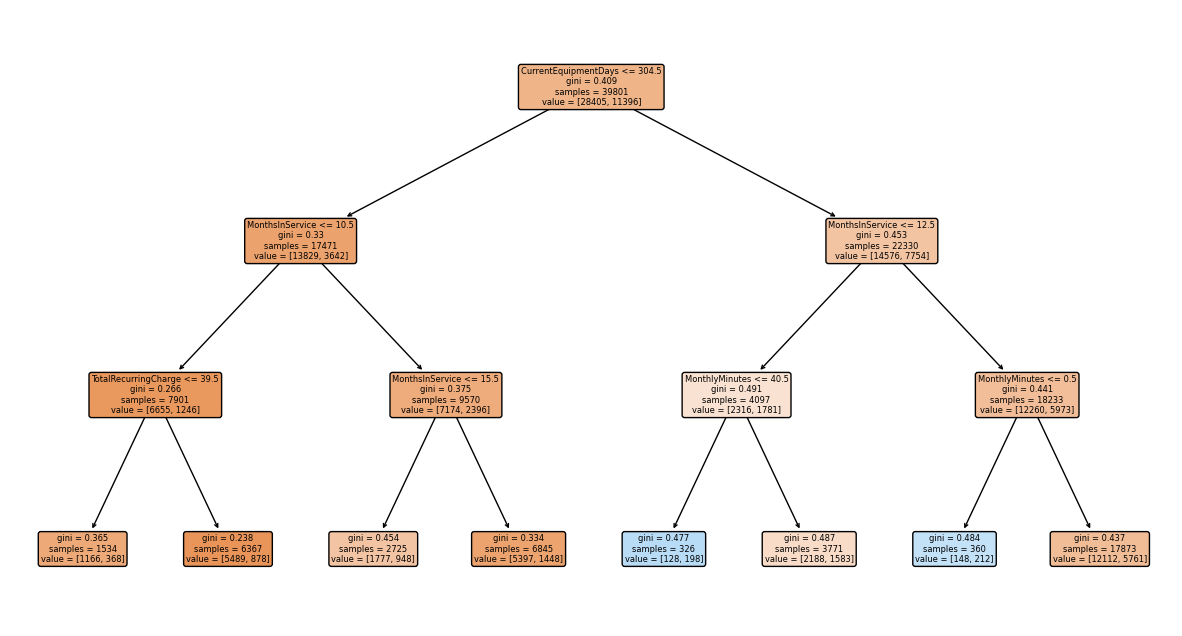

In [84]:
# plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,8))
plot_tree(train_tree, feature_names=X.columns, rounded=True, filled=True);
plt.show()

In [150]:
train_rows.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'Ow

#### 최적의 max_depth 찾기

In [120]:
from sklearn.model_selection import GridSearchCV

X = train_rows.drop(['Churn'], axis=1)
y = train_rows['Churn']

params = {'max_depth':[2,4,8,10,13,17,20]}

train_tree = DecisionTreeClassifier(max_depth=2, random_state=13)

gridsearch = GridSearchCV(estimator=train_tree, param_grid=params, cv=5)
gridsearch.fit(X, y)

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score','mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'max_depth': 2},1,0.713680,0.000014
1,{'max_depth': 4},2,0.570468,0.143673
2,{'max_depth': 8},3,0.567453,0.143174
3,{'max_depth': 10},4,0.560861,0.140493
4,{'max_depth': 13},5,0.544721,0.133609
5,{'max_depth': 17},6,0.529567,0.131215
6,{'max_depth': 20},7,0.520381,0.128355


In [133]:
best_tree = gridsearch.best_estimator_
importances = best_tree.feature_importances_
important_col = pd.Series(importances, index=X.columns).sort_values(ascending=False)[:5]
important_col

CurrentEquipmentDays    0.721162
MonthsInService         0.278838
CustomerID              0.000000
RetentionCalls          0.000000
HandsetWebCapable       0.000000
dtype: float64

### 정규화
- 결정나무에서 정규화의 유무는 의미 없다. 

In [138]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

X_mms = mms.fit_transform(X)
X_ss = ss.fit_transform(X)
X_rs = rs.fit_transform(X)

X_mms_df = pd.DataFrame(X_mms, columns=X.columns)
X_ss_df = pd.DataFrame(X_ss, columns=X.columns)
X_rs_df = pd.DataFrame(X_rs, columns=X.columns)

In [144]:
def scaler_result(scaler_df):

    X_train, X_test, y_train, y_test = train_test_split(scaler_df, y, test_size=0.2, random_state=13, stratify=y)

    train_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
    train_tree.fit(X_train, y_train)

    # 예측
    y_pred_tr = train_tree.predict(X_train)
    y_pred_test = train_tree.predict(X_test)

    # 정확도
    print(accuracy_score(y_train, y_pred_tr)) 
    print(accuracy_score(y_test, y_pred_test)) 

In [149]:
# MinMaxScaler
print('*** MinMaxScaler')
scaler_result(X_mms_df)
print('--------------------------')

print('*** StandardScaler')
scaler_result(X_ss_df)
print('--------------------------')

print('*** RobustScaler')
scaler_result(X_rs_df)
print('--------------------------')

*** MinMaxScaler
0.7170422853697144
0.7159079489498543
--------------------------
*** StandardScaler
0.7170422853697144
0.7159079489498543
--------------------------
*** RobustScaler
0.7170422853697144
0.7159079489498543
--------------------------


### plot_tree에서 확인된 변수로만 x값 넣어보기
- 변화 없다. 

In [192]:
X = train_rows[['CurrentEquipmentDays', 'MonthsInService', 'TotalRecurringCharge', 'MonthlyMinutes']]
y = train_rows['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

train_tree = DecisionTreeClassifier(max_depth=3, random_state=13)
train_tree.fit(X_train, y_train)

# 예측
y_pred_tr = train_tree.predict(X_train)
y_pred_test = train_tree.predict(X_test)

# 정확도
print(accuracy_score(y_train, y_pred_tr)) 
print(accuracy_score(y_test, y_pred_test)) 


0.7170422853697144
0.7159079489498543


#### 이상치 제거 IsolationForest
- 이상치를 제거해도 성능이 좋아지지 않는다. 

In [286]:
from sklearn.ensemble import IsolationForest
import collections

X = train_rows.drop(['Churn'], axis=1)
y = train_rows['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

clf_ss = IsolationForest(n_estimators=100,
                      max_samples="auto", 
                      contamination=0.01,
                      max_features=1,
                      bootstrap=False,
                      n_jobs=1,
                      random_state=None,
                      verbose=0)

clf_ss.fit(X_train)
y_pred_outliers = clf_ss.predict(X_train)
collections.Counter(y_pred_outliers)
# Counter({1: 39403, -1: 398})  

/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Counter({1: 39403, -1: 398})

In [287]:
X_train_out = X_train.copy()
X_train_out['Out'] = y_pred_outliers
X_train_out = X_train_out[X_train_out['Out']!=-1]

idx_list = []
for idx, row in X_train_out.iterrows():
    idx_list.append(idx)
len(idx_list)

39403

In [288]:
y_train_out = pd.DataFrame(y_train)

print(len(y_train_out))
for idx, row in y_train_out.iterrows():
    if idx not in idx_list:
        y_train_out.drop([idx], axis=0, inplace=True)
print(len(y_train_out))

39801
39403


In [289]:
y_train_out = y_train_out['Churn']
y_train_out

32881    0
26663    1
37671    0
10765    0
5144     0
        ..
3622     0
38924    1
27505    0
42675    0
37139    0
Name: Churn, Length: 39403, dtype: int64

In [216]:
train_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
train_tree.fit(X_train_out, y_train_out)

y_pred_tr = train_tree.predict(X_train_out)
print(accuracy_score(y_train_out, y_pred_tr)) 

0.713118290485496


### PCA
- pca 구분 수와 max_depth 변화에 따라 정확도가 상승한다.

In [242]:
from sklearn.decomposition import PCA

pca = PCA(20)
pca.fit(X_train_out)
res=pd.DataFrame(pca.transform(X_train_out))
res

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-60883.424484,-377.105571,45.359886,-329.387014,-2.932234,-24.281087,2.106282,36.588643,-19.043387,-12.988754,-4.331941,15.992472,-33.099884,-6.836163,-1.845393,-0.280587,-6.264999,8.602753,-0.193020,-0.330001
1,-9979.410105,332.930219,-44.783000,168.621191,-177.817611,-4.734175,119.432885,-23.080133,-25.010900,-4.484844,-11.672175,-17.795670,13.570880,13.932242,-6.075865,-1.672653,14.377449,-20.723340,1.476709,0.726375
2,-99463.507592,275.177686,194.045445,80.530417,-129.507364,-194.301799,-70.677424,9.262526,117.589557,32.092085,-25.822899,45.939363,-19.538157,33.326207,-0.309884,-10.865851,-0.544464,-4.444777,1.143966,-1.369212
3,116029.041370,-422.335628,-49.109347,77.968208,103.721361,-1.285065,-3.831057,7.616001,4.162172,-12.571007,12.710603,-43.872589,9.926792,8.191717,0.400602,2.355616,-10.547906,-2.521323,-0.317928,1.176485
4,160708.449195,-130.912793,57.740127,-480.325722,188.552823,-9.194752,34.808185,-3.161861,-56.434860,-7.769086,-12.945703,-47.493471,26.132263,-4.892050,3.058828,-0.665236,-11.197612,-8.107758,-2.075118,-0.791382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39398,172664.625587,-379.680302,35.368371,-395.890382,-152.363857,1.567212,5.457596,32.935781,-26.564994,-30.852115,-4.411562,22.362800,-8.460817,-0.516964,-0.971506,4.200621,-22.660579,2.255579,-0.983821,1.833732
39399,-109523.123088,-551.598176,-16.656308,-45.226899,-77.887142,13.970270,8.508557,21.619764,-13.964239,-9.448701,18.703515,-35.644096,-7.061080,-3.528427,-2.200822,-0.491025,-9.981173,-0.922863,0.137333,0.068314
39400,-16763.113308,-390.737387,53.277709,-18.620974,251.765856,9.497174,-5.925813,6.989470,-18.617906,-15.666845,-3.150487,-4.981966,0.204038,1.565688,8.512658,-6.789610,30.028703,-4.382982,-3.400545,-1.405719
39401,-138323.747644,482.341914,-201.802078,-146.516799,129.788246,130.404169,-71.526465,44.344224,62.531170,27.826889,10.740261,44.731924,22.448055,11.441559,12.795092,-10.531676,-7.437659,-9.387317,-4.242235,-4.241590


In [243]:
train_tree = DecisionTreeClassifier(max_depth=15, random_state=13)
train_tree.fit(res, y_train_out)

y_pred_tr = train_tree.predict(res)
print(accuracy_score(y_train_out, y_pred_tr)) 

0.8352409714996321


#### PCA, max_depth 이용해서 최적의 모델 찾기

In [291]:
del X_train_out['Out']

In [292]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X = X_train_out.copy()
y = y_train_out.copy()


estimators = [('pca', PCA()),
              ('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimators)


param_grid = [{'clf__max_depth':[2,5,10,15,20,25,30], 
                'pca__n_components':[2,5,10,15,20,25,30]}]

gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
gridsearch.fit(X, y)

print(gridsearch.best_estimator_)

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score','mean_test_score','std_test_score']]


Pipeline(steps=[('pca', PCA(n_components=5)),
                ('clf', DecisionTreeClassifier(max_depth=5))])


,params,rank_test_score,mean_test_score,std_test_score
0,"{'clf__max_depth': 2, 'pca__n_components': 2}",2,0.713093,0.000018
1,"{'clf__max_depth': 2, 'pca__n_components': 5}",2,0.713093,0.000018
2,"{'clf__max_depth': 2, 'pca__n_components': 10}",2,0.713093,0.000018
3,"{'clf__max_depth': 2, 'pca__n_components': 15}",2,0.713093,0.000018
4,"{'clf__max_depth': 2, 'pca__n_components': 20}",2,0.713093,0.000018
5,"{'clf__max_depth': 2, 'pca__n_components': 25}",2,0.713093,0.000018
6,"{'clf__max_depth': 2, 'pca__n_components': 30}",2,0.713093,0.000018
7,"{'clf__max_depth': 5, 'pca__n_components': 2}",10,0.712357,0.000396
8,"{'clf__max_depth': 5, 'pca__n_components': 5}",1,0.713220,0.001182
9,"{'clf__max_depth': 5, 'pca__n_components': 10}",11,0.712002,0.000797


#### 이상치 제거 데이터를 오버샘플링
- 오버샘플링 하니, 오히려 성능이 나빠진다. 

In [293]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train_out, y_train_out)

print(np.unique(y_train_out, return_counts=True))
print(np.unique(y_train_over, return_counts=True))

X = X_train_over.copy()
y = y_train_over.copy()


estimators = [('pca', PCA()),
              ('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimators)


param_grid = [{'pca__n_components':[2,5,10,15,20,25,30], 
                'clf__max_depth':[2,5,10,15,20,25,30]}]

gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
gridsearch.fit(X, y)

print(gridsearch.best_estimator_)

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df = score_df[['params', 'rank_test_score','mean_test_score','std_test_score']]
score_df.sort_values(by='rank_test_score', ascending=True)


(array([0, 1]), array([28098, 11305]))
(array([0, 1]), array([28098, 28098]))
Pipeline(steps=[('pca', PCA(n_components=20)),
                ('clf', DecisionTreeClassifier(max_depth=25))])


,params,rank_test_score,mean_test_score,std_test_score
39,"{'clf__max_depth': 25, 'pca__n_components': 20}",1,0.632537,0.035488
46,"{'clf__max_depth': 30, 'pca__n_components': 20}",2,0.631861,0.034089
32,"{'clf__max_depth': 20, 'pca__n_components': 20}",3,0.631238,0.035837
40,"{'clf__max_depth': 25, 'pca__n_components': 25}",4,0.631078,0.039464
47,"{'clf__max_depth': 30, 'pca__n_components': 25}",5,0.630864,0.037533
33,"{'clf__max_depth': 20, 'pca__n_components': 25}",6,0.630846,0.038331
31,"{'clf__max_depth': 20, 'pca__n_components': 15}",7,0.626113,0.031812
38,"{'clf__max_depth': 25, 'pca__n_components': 15}",8,0.625188,0.030775
45,"{'clf__max_depth': 30, 'pca__n_components': 15}",9,0.625009,0.026749
27,"{'clf__max_depth': 15, 'pca__n_components': 30}",10,0.624565,0.063702


In [298]:
X = X_train_out.copy()
y = y_train_out.copy()


estimators = [('clf', DecisionTreeClassifier())]
pipe = Pipeline(estimators)


param_grid = [{'clf__max_depth':[2,5,10,15,20,25,30]}]

gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
gridsearch.fit(X, y)

print(gridsearch.best_estimator_)

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score','mean_test_score','std_test_score']]

Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=5))])


,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},2,0.712915,0.000367
1,{'clf__max_depth': 5},1,0.716189,0.002039
2,{'clf__max_depth': 10},3,0.702561,0.002281
3,{'clf__max_depth': 15},4,0.674314,0.004488
4,{'clf__max_depth': 20},5,0.645585,0.003517
5,{'clf__max_depth': 25},6,0.626678,0.003788
6,{'clf__max_depth': 30},7,0.622770,0.004765


In [300]:
# 랜덤포레스트
X = X_train_out.copy()
y = y_train_out.copy()


estimators = [('clf', RandomForestClassifier())]
pipe = Pipeline(estimators)

param_grid = [{
    'clf__n_estimators':[100],
    'clf__max_depth':[6,8,10,12],
    'clf__min_samples_leaf':[8,12,18],
    'clf__min_samples_split':[8,16,20]
}]

gridsearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
gridsearch.fit(X, y)

print(gridsearch.best_estimator_)

score_df = pd.DataFrame(gridsearch.cv_results_)
score_df[['params', 'rank_test_score','mean_test_score','std_test_score']]

Pipeline(steps=[('clf',
                 RandomForestClassifier(max_depth=12, min_samples_leaf=8,
                                        min_samples_split=16))])


,params,rank_test_score,mean_test_score,std_test_score
0,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",28,0.714844,0.000853
1,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",32,0.714539,0.000443
2,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",30,0.714641,0.000698
3,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",31,0.714616,0.000402
4,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",36,0.714159,0.000658
5,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",33,0.714463,0.000583
6,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",34,0.714438,0.000870
7,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",29,0.714819,0.000981
8,"{'clf__max_depth': 6, 'clf__min_samples_leaf':...",35,0.714413,0.000614
9,"{'clf__max_depth': 8, 'clf__min_samples_leaf':...",23,0.716062,0.001574


### 여러 모델 한 번에 비교하기
- LogisticRegression, DecisionTreeClassifier, RandomForestClassifier

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

# 변수에 할당 
lr_clf = LogisticRegression(random_state=13, solver='liblinear')
dt_clf = DecisionTreeClassifier(random_state=13, max_depth=5)
rf_clf = RandomForestClassifier(random_state=12, min_samples_leaf=8, min_samples_split=16, 
                                n_jobs=-1, n_estimators=100)
lgb_clf = LGBMClassifier(n_estimators=400)
evals = [(X_train_out.values, y_train_out)]

# fit
lr_clf.fit(X_train_out, y_train_out)
dt_clf.fit(X_train_out, y_train_out)
rf_clf.fit(X_train_out, y_train_out)
lgb_clf.fit(X_train_out.values, y_train_out, early_stopping_rounds=100, eval_set=evals)

models = [lr_clf, dt_clf, rf_clf, lgb_clf]
model_names = ['LogisticReg','DecisionTree','RandomForest','LGBMClassifier']
col_names = ['accuracy','precision','recall','f1','auc']

tmp = []
result_df = pd.DataFrame(columns=['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'])
for model in models:
    if model == lgb_clf:
        pred = lgb.predict(X_test.values)
    else:
        pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    data = {
        'accuracy_score' : acc,
        'precision_score' : pre,
        'recall_score' : re,
        'f1_score' : f1,
        'roc_auc_score' : auc
    }

    result_df = result_df.append(data, ignore_index=True)
    result_df = result_df.rename(index={0:'LogisticReg', 1:'DecisionTree', 2:'RandomForest', 3:'LGBMClassifier'})
result_df

/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.593241
[2]	valid_0's binary_logloss: 0.588242
[3]	valid_0's binary_logloss: 0.584065
[4]	valid_0's binary_logloss: 0.580563
[5]	valid_0's binary_logloss: 0.577524
[6]	valid_0's binary_logloss: 0.574928
[7]	valid_0's binary_logloss: 0.572607
[8]	valid_0's binary_logloss: 0.570383
[9]	valid_0's binary_logloss: 0.568319
[10]	valid_0's binary_logloss: 0.566464
[11]	valid_0's binary_logloss: 0.5648
[12]	valid_0's binary_logloss: 0.563142
[13]	valid_0's binary_logloss: 0.561573
[14]	valid_0's binary_logloss: 0.560136
[15]	valid_0's binary_logloss: 0.558757
[16]	valid_0's binary_logloss: 0.557504
[17]	valid_0's binary_logloss: 0.556276
[18]	valid_0's binary_logloss: 0.554969
[19]	valid_0's binary_logloss: 0.553867
[20]	valid_0's binary_logloss: 0.55274
[21]	valid_0's binary_logloss: 0.551607
[22]	valid_0's binary_logloss: 0.550561
[23]	valid_0's binary_logloss: 0.549484
[24]	valid_0's binary_logloss: 0.548388
[25]	valid_0's binary_logloss: 0.54736
[26]	valid_0'

/Users/nayoung/miniforge3/envs/ds_study/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/vm/xb_h6qws599f9m01dh0kl9sc0000gn/T/ipykernel_46003/1351439699.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(data, ignore_index=True)
/var/folders/vm/xb_h6qws599f9m01dh0kl9sc0000gn/T/ipykernel_46003/1351439699.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(data, ignore_index=True)
/var/folders/vm/xb_h6qws599f9m01dh0kl9sc0000gn/T/ipykernel_46003/1351439699.py:47: FutureWarning: The frame.append method is deprecated a

,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
LogisticReg,0.713697,0.000000,0.000000,0.000000,0.500000
DecisionTree,0.714200,0.504690,0.094419,0.159077,0.528623
RandomForest,0.719425,0.606742,0.056862,0.103979,0.521039
LGBMClassifier,0.722741,0.548283,0.179361,0.270299,0.560041
